# **Sepide** **Mashayekhi**

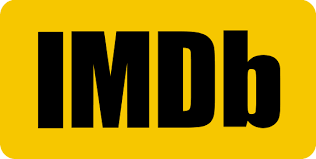

Data_analysis_and_classifier_whit_deep_learning_imdb_dataset 

processing

In [1]:
from  tensorflow import keras
import numpy as np 

In [19]:
from keras.datasets import imdb
(train_data,train_label),(test_data,test_label)=imdb.load_data(num_words=10000)

In [20]:
word_index=imdb.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])

In [21]:
decoded_review=' '.join(
    [reverse_word_index.get(i-3,'?') for i in train_data[0]]
)

In [22]:
def vectorize_sequence(sequence,dimension=10000):
  results=np.zeros((len(sequence),dimension))
  for i ,sequence in enumerate(sequence):
    results[i,sequence]=1
  return results


In [23]:
x_train=vectorize_sequence(train_data)
x_test=vectorize_sequence(test_data)

In [24]:
y_train=np.asarray(train_label).astype('float32')
y_test=np.asarray(test_label).astype('float32')

train_model

In [25]:
from keras.models import Sequential
from keras.layers import Dense

In [26]:
# creat model 
model=Sequential()  
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [27]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',metrics=['accuracy'])


In [28]:
history=model.fit(x_train,y_train,epochs=8,batch_size=512)

Epoch 1/8
49/49 [==============================] - 2s 31ms/step - loss: 0.4483 - accuracy: 0.8269
Epoch 2/8
49/49 [==============================] - 1s 29ms/step - loss: 0.2559 - accuracy: 0.9090
Epoch 3/8
49/49 [==============================] - 1s 30ms/step - loss: 0.1983 - accuracy: 0.9296
Epoch 4/8
49/49 [==============================] - 1s 30ms/step - loss: 0.1657 - accuracy: 0.9411
Epoch 5/8
49/49 [==============================] - 1s 29ms/step - loss: 0.1422 - accuracy: 0.9504
Epoch 6/8
49/49 [==============================] - 1s 29ms/step - loss: 0.1255 - accuracy: 0.9562
Epoch 7/8
49/49 [==============================] - 1s 30ms/step - loss: 0.1116 - accuracy: 0.9605
Epoch 8/8
49/49 [==============================] - 1s 29ms/step - loss: 0.0975 - accuracy: 0.9660


In [29]:
result=model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.3920 - accuracy: 0.8701


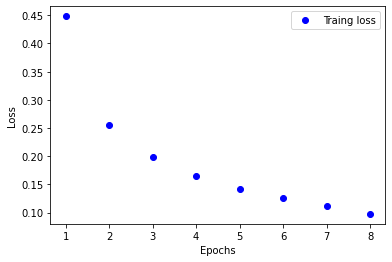

In [38]:
import matplotlib.pyplot as plt 
hi=history.history
loss_value=hi['loss']
acc=hi['accuracy']
Epochs=range(1,len(acc)+1)

plt.plot(Epochs,loss_value,'bo',label='Traing loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()